# Markov Process Renormalization

Galen Wilkerson



Here we look at what happens when we coarse-grain a Markov matrix in time.


Based on lectures by Simon DeDeo:

https://www.complexityexplorer.org/courses/67-introduction-to-renormalization

# Setup and Functions

In [1]:
import numpy as np
import math

import sympy 
from sympy import *
from sympy import Matrix
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function

import networkx as nx

import __future__
import __init__

%matplotlib inline

import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Latex

#If you want all graphs to be drawn inline, then you can set a global parameter.
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

import string


def create_Markov_matrix(height, width):
    '''
    randomly create a 'right' markov matrix (each row sums to 1)
    '''
    
    x = np.random.random(size=[width, height])

    # use float128 for precision when taking powers
    markov_matrix = x / x.sum(axis=0, dtype = np.float128)  

    markov_matrix = markov_matrix.transpose()
    
    return(markov_matrix)


def show_latex_matrix(matrix1):
    '''
    '''
    return(Latex('$%s$'%latex(Matrix(matrix1))))


def create_Markov_graph(markov_matrix, mapping = None):
    '''
    inputs:
    numpy matrix
    a mapping dictionary from integer node ids to anything
    
    returns:
    a networkx graph
    '''

    G=nx.from_numpy_matrix(markov_matrix, create_using=nx.DiGraph())

    # if no mapping is passed, just keeps the node ids
    if (mapping == None):
        mapping = dict(zip(list(range(markov_matrix.shape[0])), list(range(markov_matrix.shape[0]))))
        
    G=nx.relabel_nodes(G, mapping)

    nx.set_node_attributes(G, 'fontsize', 10)
    nx.set_node_attributes(G, 'color', 'black')

    nx.set_edge_attributes(G, 'fontsize', 10)
    nx.set_edge_attributes(G, 'color', 'grey')

    weights = nx.get_edge_attributes(G, 'weight')
    weights = nx.get_edge_attributes(G, 'weight')
    vals = weights.values()
    vals = np.array(list(vals)).astype(float)
    vals = np.round(vals, 2)
    weights = dict(zip(list(weights.keys()),(vals)))
    
    nx.set_edge_attributes(G, name='label', values=weights)
    
    return(G)


def compute_markov_states(markov_matrix, mapping = None, num_trials = 10):
    '''
    inputs:
    a numpy right markov matrix    
    a mapping dictionary from integer node ids to anything
    
    returns:
    list of all states of system
    '''

    states = []
    
    # if no mapping is passed, just keeps the node ids
    if (mapping == None):
        mapping = dict(zip(list(range(markov_matrix.shape[0])), list(range(markov_matrix.shape[0]))))
    
    height, width = markov_matrix.shape

    # set up horizontal cumulative sums for computing next state
    cum_sum = markov_matrix.cumsum(axis=1)

    # start state
    state_index = np.random.choice(list(range(height)))
    state = np.zeros(height)
    state[state_index] = 1

    states.append(mapping[state_index])    
    
    for i in range(num_trials):
        rand_num = np.random.rand()
        state_index = np.where(state == 1)[0][0]
        next_state = np.where(cum_sum[state_index,:] > rand_num)[0][0]
        state_index = next_state
        #print(mapping[state_index])
        #input()  #pause at each step
        states.append(mapping[state_index])
    return(states)


def create_alphabet_mapping_dict():
    '''
    map the node id numbers to letters
    '''
    
    # the node ids (let's use letters)
    alphabet = list(string.ascii_uppercase)
    keys = list(range(len(alphabet)))
    mapping = dict(zip(keys, alphabet))
    
    return mapping

def coarse_grain_markov(markov_matrix, timesteps):
    '''
    coarsegrain the Markov Matrix
    
    inputs:
    a right-markov matrix
    number of timesteps (powers of matrix)
    
    returns
    a right-markov matrix equal to the specified power of the input matrix
    '''
    
    return(np.linalg.matrix_power(markov_matrix, timesteps))
    

# Lecture 1 - Mathematics of Coarse Grained Markov Chains

In [32]:
height = 2
width = 2

# map the node id numbers to letters
mapping = create_alphabet_mapping_dict()

# create the markov matrix
markov_matrix = create_Markov_matrix(height, width)
show_latex_matrix(markov_matrix)

<IPython.core.display.Latex object>

In [33]:
# check that rows sum to 1
markov_matrix.sum(axis=1)

array([ 1.0,  1.0], dtype=float128)

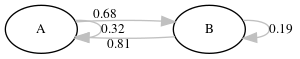

In [34]:
# create networkx graph
G = create_Markov_graph(markov_matrix, mapping)

# draw networkx graph with graphviz
im = draw(G, layout='circo')
im

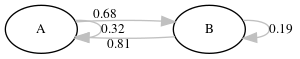

In [35]:
# draw networkx graph with graphviz
im = draw(G, layout='circo')
im

### compute the states when using the edge probabilites from a random start state

In [37]:
num_trials = 10

compute_markov_states(markov_matrix, mapping, num_trials)

['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'B']

## Now, coarse-grain the Markov Matrix (2 time steps instead of 1)

In [38]:
timesteps = 2

coarse_markov_2 = coarse_grain_markov(markov_matrix, timesteps)
show_latex_matrix(coarse_markov_2)

<IPython.core.display.Latex object>

In [39]:
# check that each row sums to 1
coarse_markov_2.sum(axis = 1)

array([ 1.0,  1.0], dtype=float128)

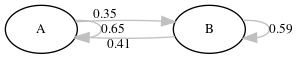

In [40]:
# create networkx graph
G = create_Markov_graph(coarse_markov_2, mapping)

# draw networkx graph with graphviz
im = draw(G, layout='circo')
im

## Now, coarsegrain the Markov Matrix to arbitrary steps (set timesteps and re-run)

In [45]:
timesteps = 3

In [46]:
coarse_markov = coarse_grain_markov(markov_matrix, timesteps)
show_latex_matrix(coarse_markov)

<IPython.core.display.Latex object>

In [47]:
# check that each row sums to 1
coarse_markov.sum(axis = 1)

array([ 1.0,  1.0], dtype=float128)

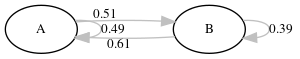

In [48]:
# create networkx graph
G = create_Markov_graph(coarse_markov, mapping)

# draw networkx graph with graphviz
im = draw(G, layout='circo')
im

# Lecture 2 - Mathematics of Coarse Grained Markov Chains

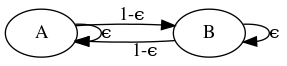

In [14]:
G = nx.DiGraph()
G.add_edge("A", "B", {"label":r'1-ϵ'})
G.add_edge("B", "A", {"label":r'1-ϵ'})
G.add_edge("A", "A", {"label":r'ϵ'})
G.add_edge("B", "B", {"label":r'ϵ'})


# draw networkx graph with graphviz
im = draw(G, layout='circo')
im

We use powers of the **stochastic matrix** to change the coarse-graining:
$$
\begin{pmatrix}
    p(A|A)       & p(A|B) \\
    p(B|A)       & p(B|B) 
\end{pmatrix}
$$

like this:
$$
\begin{pmatrix}
    p(A|A)       & p(A|B) \\
    p(B|A)       & p(B|B) 
\end{pmatrix}
\begin{pmatrix}
    p(A)     \\
    p(B)       
\end{pmatrix}
$$

This defines the evolution operator $T$:
$$
T = \begin{pmatrix}
    \epsilon       & 1-\epsilon \\
    1-\epsilon       & \epsilon
\end{pmatrix}
$$

Coarse-graining by 2 time-steps gives us

$$
T^2 = \begin{pmatrix}
    \epsilon       & 1-\epsilon \\
    1-\epsilon       & \epsilon
\end{pmatrix}^2
$$

$$
= \begin{pmatrix}
    \epsilon       & 1-\epsilon \\
    1-\epsilon       & \epsilon
\end{pmatrix}
\begin{pmatrix}
    \epsilon       & 1-\epsilon \\
    1-\epsilon       & \epsilon
\end{pmatrix}
$$

$$
 = \begin{pmatrix}
    \epsilon^2 + (1-\epsilon)^2      & 2 \epsilon (1-\epsilon)  \\
    2 \epsilon (1-\epsilon)       & (1-\epsilon)^2 + \epsilon^2
\end{pmatrix}
$$

Giving us:

$$
T^2 = \begin{pmatrix}
    1-2\epsilon + 2\epsilon^2      & 2 \epsilon-2 \epsilon^2  \\
    2 \epsilon-2 \epsilon^2       & 1-2\epsilon + 2\epsilon^2
\end{pmatrix}
$$

Taking eigenvectors and eigenvalues of $T$:

$$
T v_1 = \lambda_1 v_1
$$

$$
T v_2 = \lambda_1 v_2
$$

where $v_1, v_2$ are the eigenvectors and $\lambda_1, \lambda_2$ are the eigenvalues.

We can now write a probability distribution as a weighted sum of the eigenvectors:
$$
p = \alpha_1 v_1 + \alpha_2 v_2
$$

which when transformed into "eigenvector space" is

$$
\begin{pmatrix}\alpha_1 \\ \alpha_2\end{pmatrix}
$$

The eigenvalues of $T$ are 1 and $2\epsilon-1$.

This lets us write the diagonalized version of of the evolution operator $\hat{T}$

$$
\hat{T} = \begin{pmatrix}
    1       & 0 \\
    0       & 2\epsilon-1
\end{pmatrix}
$$

When the transformed evolution operator (stochastic matrix) $\hat{T}$ operates in the eigenvector space:

$$
\begin{pmatrix}
    1       & 0 \\
    0       & 2\epsilon-1
\end{pmatrix} \begin{pmatrix}\alpha_1 \\ \alpha_2\end{pmatrix} = \begin{pmatrix}\alpha_1 \\ (2\epsilon-1)\alpha_2\end{pmatrix}
$$


For a stochastic matrix, one of its eigenvalues will always have length 1, and the other eigenvalue will have length < 1.

As we coarse-grain further, we get

$$
T^n = \begin{pmatrix}
    1       & 0 \\
    0       & (2\epsilon-1)^n
\end{pmatrix} \begin{pmatrix}\alpha_1 \\ \alpha_2\end{pmatrix} = \begin{pmatrix}\alpha_1 \\ (2\epsilon-1)^n\alpha_2\end{pmatrix}
$$

For large $n$, the term $(2\epsilon-1)^n$ will get very small, so that in the limit as $n \to \infty$, 

$
T^n\begin{pmatrix}\alpha_1 \\ \alpha_2\end{pmatrix} \to \begin{pmatrix}\alpha_1 \\ 0\end{pmatrix}
$

In the limit this will map the probabilty matrix to the first eigenvector.

$$
p \to \vec v_1
$$

This is the **stationary distribution** of the original stochastic matrix.

We start out with a model that is described by many parameters (having many degrees of freedom), 

but coarse-graining enough simplifies the description and reduces the description down to one parameter.

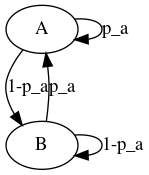

In [15]:
G = nx.DiGraph()
G.add_edge("A", "B", {"label":'1-p_a'})
G.add_edge("B", "A", {"label":'p_a'})
G.add_edge("A", "A", {"label":'p_a'})
G.add_edge("B", "B", {"label":'1-p_a'})


# draw networkx graph with graphviz
draw(G, layout='dot')

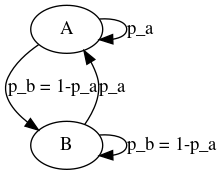

In [16]:
G = nx.DiGraph()
G.add_edge("A", "B", {"label":'p_b = 1-p_a'})
G.add_edge("B", "A", {"label":'p_a'})
G.add_edge("A", "A", {"label":'p_a'})
G.add_edge("B", "B", {"label":'p_b = 1-p_a'})


# draw networkx graph with graphviz
draw(G, layout='dot')

In [93]:
# get the eigenvalues and eigenvectors
lambdas, eig_vectors = np.linalg.eig(markov_matrix.astype(np.float))
print(lambdas)
print()
print(eig_vectors)

[ 1.         -0.48734337]

[[ 0.70710678 -0.64384757]
 [ 0.70710678  0.76515378]]


### Try iterating the coarse-graining to show approach to the fixed point

In [106]:
num_coarse_grainings = 50
lambda_values = np.zeros([num_coarse_grainings, 2])
eigenvectors = []

for i in range(num_coarse_grainings):
    coarse_markov = coarse_grain_markov(markov_matrix, i)
    
    lambdas, eig_vectors = np.linalg.eig(coarse_markov.astype(np.float))
    lambda_values[i] = lambdas
    eigenvectors.append(eig_vectors)
    
    #print('$\lambdas$:',lambdas)
    #print('v',eig_vectors)
    #print()

### Plot the phase-space of the eigenvalues

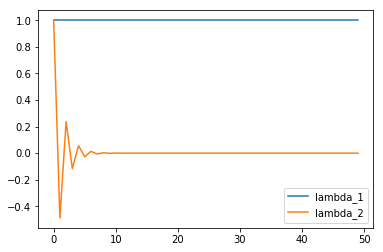

In [107]:
import pandas as pd

df = pd.DataFrame(lambda_values, columns=['lambda_1', 'lambda_2'])
df.plot();

In [108]:
print(eigenvectors)

[array([[ 1.,  0.],
       [ 0.,  1.]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0.64384757],
       [ 0.70710678,  0.76515378]]), array([[ 0.70710678, -0